In [98]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [99]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

lat_lngs

In [100]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [101]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kodiak us
rikitea pf
seoul kr
dukat ru
maceio br
mataura pf
douglas us
rikitea pf
kodiak us
atuona pf
kaitangata nz
tabou ci
bluff nz
busselton au
arraial do cabo br
atuona pf
kahului us
barcelos br
khatanga ru
mataura pf
ilebo cd
beder dk
vaini to
rikitea pf
diffa ne
san vicente ar
taolanaro mg
mataura pf
bluff nz
hermanus za
yellowknife ca
san rafael ar
taolanaro mg
chicama pe
hastings us
najran sa
alofi nu
hazorasp uz
harlingen nl
husavik is
alghero it
saint-philippe re
avarua ck
araouane ml
atuona pf
busselton au
mataura pf
kodiak us
northam au
grindavik is
hermanus za
puerto ayora ec
bredasdorp za
okha ru
bolobo cd
hobart au
nikolskoye ru
castro cl
port alfred za
cape town za
umzimvubu za
taolanaro mg
ushuaia ar
haifa il
hilo us
taolanaro mg
mys shmidta ru
ancud cl
chkalovskoye ru
hermanus za
atuona pf
moose factory ca
butaritari ki
isangel vu
rikitea pf
talnakh ru
butaritari ki
hobart au
caxito ao
lebu cl
ushuaia ar
yellowknife ca
bluff nz
oskemen kz
butaritari ki
bandarbeyla so


lagoa pt
vaini to
fukuma jp
talavera de la reina es
punta arenas cl
tasiilaq gl
punta arenas cl
luanda ao
ushuaia ar
te anau nz
vaini to
atlantic beach us
bandar-e lengeh ir
hithadhoo mv
mariental na
barrow us
tomatlan mx
saleaula ws
touros br
hobart au
geraldton au
castro cl
avarua ck
yellowknife ca
nara ml
ibra om
kapaa us
mount isa au
new norfolk au
kapaa us
mabay ph
hamilton bm
constitucion mx
gao ml
aklavik ca
marawi sd
milicz pl
bengkulu id
male mv
grindavik is
esperance au
port lincoln au
cape town za
casino au
new norfolk au
punta arenas cl
jamestown sh
pevek ru
geraldton au
homer us
naze jp
hobart au
cayenne gf
grand river south east mu
belushya guba ru
martapura id
camabatela ao
ilulissat gl
bonthe sl
kavieng pg
albany au
belushya guba ru
port elizabeth za
hamilton bm
williams lake ca
vaini to
zhanjiang cn
bredasdorp za
rikitea pf
norman wells ca
kapaa us
ballina ie
hami cn
cidreira br
belushya guba ru
nsoko sz
carnarvon au
provideniya ru
itarema br
hofn is
tostedt de
toliary

grand river south east mu
airai pw
laguna br
ciras af
kudahuvadhoo mv
lata sb
sentyabrskiy ru
faanui pf
longyearbyen sj
tilichiki ru
mataura pf
soyo ao
nantucket us
karratha au
karwar in
cherskiy ru
quatre cocos mu
hun ly
puerto ayora ec
itarema br


In [102]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [103]:
# IMport the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [104]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [105]:
# Starting URL for weather map API call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=880be592285101d0ffca073854e02f60


In [106]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [107]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | seoul
Processing Record 4 of Set 1 | dukat
Processing Record 5 of Set 1 | maceio
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | douglas
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | tabou
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | kahului
Processing Record 15 of Set 1 | barcelos
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | ilebo
Processing Record 18 of Set 1 | beder
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | diffa
Processing Record 21 of Set 1 | san vicente
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 1 | hermanus
Processing Record 24 of Set 1 | yellowknife
Processing Rec

Processing Record 42 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 43 of Set 4 | mandan
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | rocha
Processing Record 46 of Set 4 | caravelas
Processing Record 47 of Set 4 | tornio
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | kavieng
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | nicoya
Processing Record 2 of Set 5 | waipawa
Processing Record 3 of Set 5 | juba
Processing Record 4 of Set 5 | port augusta
Processing Record 5 of Set 5 | merauke
Processing Record 6 of Set 5 | kingaroy
Processing Record 7 of Set 5 | tahlequah
Processing Record 8 of Set 5 | muriwai beach
Processing Record 9 of Set 5 | thompson
Processing Record 10 of Set 5 | ozuluama
Processing Record 11 of Set 5 | bargal
City not found. Skipping...
Processing Record 12 of Set 5 | shkotovo-26
City not found. Skipping...
Processing Record 13 of Set 5 | lichinga
Processing Rec

Processing Record 30 of Set 8 | mabay
Processing Record 31 of Set 8 | hamilton
Processing Record 32 of Set 8 | constitucion
Processing Record 33 of Set 8 | gao
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | milicz
Processing Record 36 of Set 8 | male
Processing Record 37 of Set 8 | casino
Processing Record 38 of Set 8 | homer
Processing Record 39 of Set 8 | naze
Processing Record 40 of Set 8 | cayenne
Processing Record 41 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 8 | martapura
Processing Record 43 of Set 8 | bonthe
Processing Record 44 of Set 8 | williams lake
Processing Record 45 of Set 8 | zhanjiang
Processing Record 46 of Set 8 | ballina
Processing Record 47 of Set 8 | hami
Processing Record 48 of Set 8 | nsoko
Processing Record 49 of Set 8 | itarema
Processing Record 50 of Set 8 | hofn
Processing Record 1 of Set 9 | tostedt
Processing Record 2 of Set 9 | toliary
City not found. Skipping...
Processing Record 3 o

Processing Record 17 of Set 12 | rostaq
City not found. Skipping...
Processing Record 18 of Set 12 | golcuk
City not found. Skipping...
Processing Record 19 of Set 12 | daokou
Processing Record 20 of Set 12 | sawtell
Processing Record 21 of Set 12 | kasane
Processing Record 22 of Set 12 | jaca
Processing Record 23 of Set 12 | jacareacanga
Processing Record 24 of Set 12 | boshnyakovo
Processing Record 25 of Set 12 | huicungo
Processing Record 26 of Set 12 | nishihara
Processing Record 27 of Set 12 | henties bay
Processing Record 28 of Set 12 | wanaka
Processing Record 29 of Set 12 | mangalia
Processing Record 30 of Set 12 | porto novo
Processing Record 31 of Set 12 | tallahassee
Processing Record 32 of Set 12 | cockburn town
Processing Record 33 of Set 12 | haines junction
Processing Record 34 of Set 12 | fasa
Processing Record 35 of Set 12 | noumea
Processing Record 36 of Set 12 | mountain home
Processing Record 37 of Set 12 | batagay-alyta
Processing Record 38 of Set 12 | port macquar

In [132]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,45.91,53,100,12.66,US,2022-04-26 19:17:36
1,Rikitea,-23.1203,-134.9692,78.24,75,100,22.26,PF,2022-04-26 19:17:36
2,Seoul,37.5683,126.9778,60.19,30,0,9.22,KR,2022-04-26 19:17:37
3,Dukat,62.5500,155.5500,12.52,95,100,4.09,RU,2022-04-26 19:17:37
4,Maceio,-9.6658,-35.7353,78.24,78,75,18.41,BR,2022-04-26 19:13:54
5,Mataura,-46.1927,168.8643,51.48,99,79,2.59,NZ,2022-04-26 19:17:38
6,Douglas,41.3000,-96.1670,67.93,26,0,12.66,US,2022-04-26 19:15:31
7,Atuona,-9.8000,-139.0333,78.93,75,24,23.82,PF,2022-04-26 19:17:38
8,Kaitangata,-46.2817,169.8464,49.53,93,72,6.69,NZ,2022-04-26 19:17:39
9,Tabou,4.4230,-7.3528,81.43,81,100,6.11,CI,2022-04-26 19:15:38


In [133]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-04-26 19:17:36,57.7900,-152.4072,45.91,53,100,12.66
1,Rikitea,PF,2022-04-26 19:17:36,-23.1203,-134.9692,78.24,75,100,22.26
2,Seoul,KR,2022-04-26 19:17:37,37.5683,126.9778,60.19,30,0,9.22
3,Dukat,RU,2022-04-26 19:17:37,62.5500,155.5500,12.52,95,100,4.09
4,Maceio,BR,2022-04-26 19:13:54,-9.6658,-35.7353,78.24,78,75,18.41


In [135]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-04-26 19:17:36,57.7900,-152.4072,45.91,53,100,12.66
1,Rikitea,PF,2022-04-26 19:17:36,-23.1203,-134.9692,78.24,75,100,22.26
2,Seoul,KR,2022-04-26 19:17:37,37.5683,126.9778,60.19,30,0,9.22
3,Dukat,RU,2022-04-26 19:17:37,62.5500,155.5500,12.52,95,100,4.09
4,Maceio,BR,2022-04-26 19:13:54,-9.6658,-35.7353,78.24,78,75,18.41
...,...,...,...,...,...,...,...,...,...
572,Laguna,US,2022-04-26 19:29:49,38.4210,-121.4238,74.14,40,0,6.91
573,Soyo,AO,2022-04-26 19:33:27,-6.1349,12.3689,78.39,89,100,7.23
574,Nantucket,US,2022-04-26 19:31:11,41.2835,-70.0995,53.71,81,100,10.36
575,Karwar,IN,2022-04-26 19:33:27,14.8000,74.1333,81.52,80,19,1.32


In [136]:
# Create the output file (CSV).
#output_data_file = "C:\\Users\\Bryan\\UofO Bootcamp\\World_Weather_Analysis\\weather_data\\cities.csv"
# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [139]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-04-26 19:17:36,57.7900,-152.4072,45.91,53,100,12.66
1,Rikitea,PF,2022-04-26 19:17:36,-23.1203,-134.9692,78.24,75,100,22.26
2,Seoul,KR,2022-04-26 19:17:37,37.5683,126.9778,60.19,30,0,9.22
3,Dukat,RU,2022-04-26 19:17:37,62.5500,155.5500,12.52,95,100,4.09
4,Maceio,BR,2022-04-26 19:13:54,-9.6658,-35.7353,78.24,78,75,18.41


In [140]:
# Extract relevant fields from the DataFrame for plotting.


lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-04-26 19:17:36,57.7900,-152.4072,45.91,53,100,12.66
1,Rikitea,PF,2022-04-26 19:17:36,-23.1203,-134.9692,78.24,75,100,22.26
2,Seoul,KR,2022-04-26 19:17:37,37.5683,126.9778,60.19,30,0,9.22
3,Dukat,RU,2022-04-26 19:17:37,62.5500,155.5500,12.52,95,100,4.09
4,Maceio,BR,2022-04-26 19:13:54,-9.6658,-35.7353,78.24,78,75,18.41
...,...,...,...,...,...,...,...,...,...
572,Laguna,US,2022-04-26 19:29:49,38.4210,-121.4238,74.14,40,0,6.91
573,Soyo,AO,2022-04-26 19:33:27,-6.1349,12.3689,78.39,89,100,7.23
574,Nantucket,US,2022-04-26 19:31:11,41.2835,-70.0995,53.71,81,100,10.36
575,Karwar,IN,2022-04-26 19:33:27,14.8000,74.1333,81.52,80,19,1.32


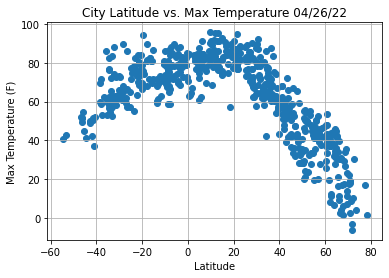

In [141]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps)
            #edgecolor="black", linewidths=1, marker="o")
            #alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("C:\\Users\\Bryan\\UofO Bootcamp\\World_Weather_Analysis\\weather_data\\Fig1.png")

# Show plot.
plt.show()

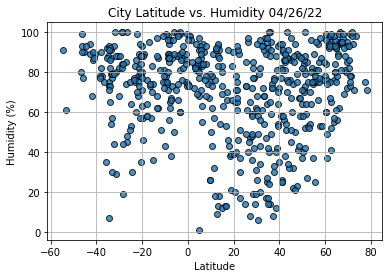

In [143]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:\\Users\\Bryan\\UofO Bootcamp\\World_Weather_Analysis\\weather_data\\Fig2.png")
# Show plot.
plt.show()

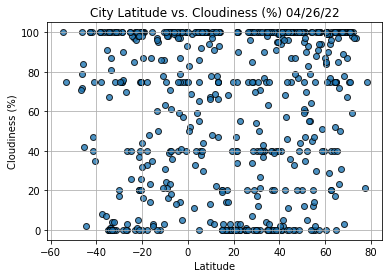

In [144]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:\\Users\\Bryan\\UofO Bootcamp\\World_Weather_Analysis\\weather_data\\Fig3.png")
# Show plot.
plt.show()

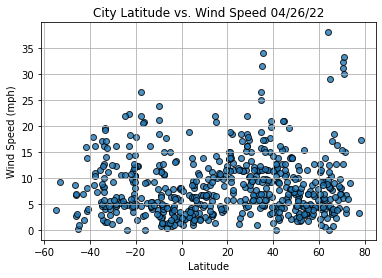

In [145]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:\\Users\\Bryan\\UofO Bootcamp\\World_Weather_Analysis\\weather_data\\Fig4.png")
# Show plot.
plt.show()

In [151]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()
    


In [152]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-04-26 19:17:36,57.7900,-152.4072,45.91,53,100,12.66
2,Seoul,KR,2022-04-26 19:17:37,37.5683,126.9778,60.19,30,0,9.22
3,Dukat,RU,2022-04-26 19:17:37,62.5500,155.5500,12.52,95,100,4.09
6,Douglas,US,2022-04-26 19:15:31,41.3000,-96.1670,67.93,26,0,12.66
9,Tabou,CI,2022-04-26 19:15:38,4.4230,-7.3528,81.43,81,100,6.11


In [153]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

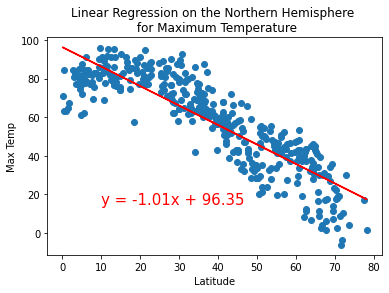

In [184]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,15))

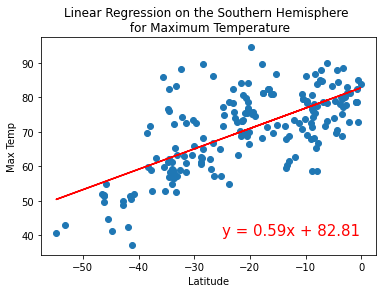

In [183]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,40))

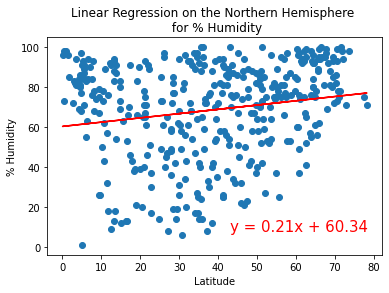

In [182]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(43,8))

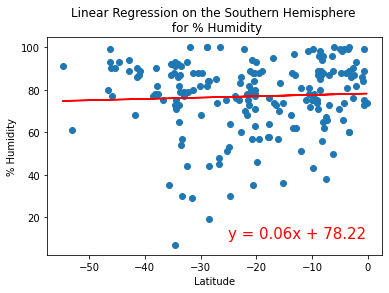

In [181]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,10))

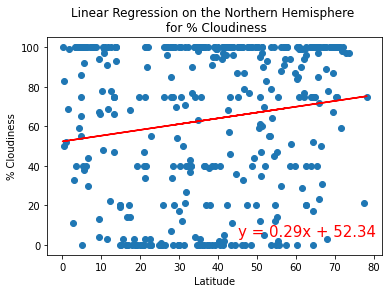

In [195]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,4.5))

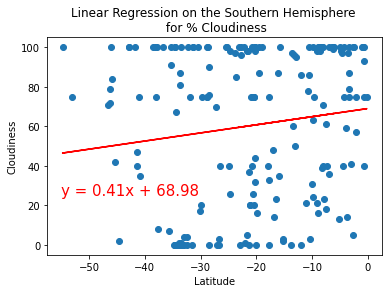

In [197]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-55,25))


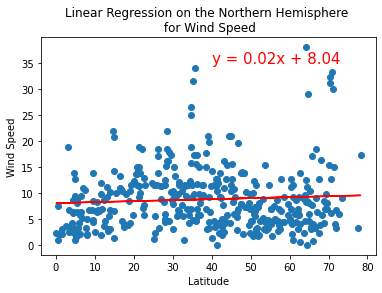

In [199]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

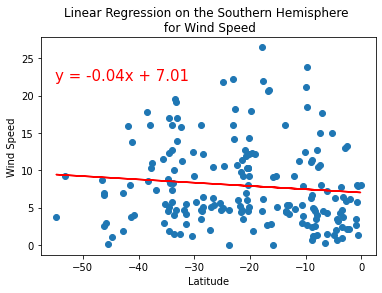

In [203]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,22))

In [205]:
print(city_weather)


{'coord': {'lon': 15.9477, 'lat': 29.1268}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.83, 'feels_like': 78.85, 'temp_min': 80.83, 'temp_max': 80.83, 'pressure': 1006, 'humidity': 14, 'sea_level': 1006, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 17.92, 'deg': 62, 'gust': 30.29}, 'clouds': {'all': 70}, 'dt': 1651001608, 'sys': {'country': 'LY', 'sunrise': 1650946753, 'sunset': 1650994113}, 'timezone': 7200, 'id': 2216645, 'name': 'Hūn', 'cod': 200}


In [209]:
# Export city_data_df to csv.
city_data_df.to_csv(r"city_data.csv", index=False, header=True)